# Regresión No Lineal Polinómica

Mateo Rosero

In [53]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# Importación del dataset
dataset = pd.read_csv('Life Expectancy Data.csv')

In [40]:
# Valores nulos en la columna
dataset['Life expectancy'].isnull().sum()

10

In [41]:
# Limpieza de datos: reemplazar valores nulos en 'Life expectancy' con la mediana
mediana = dataset['Life expectancy'].median()
dataset['Life expectancy'].fillna(mediana, inplace=True)

In [42]:
# Definición de variables independiente y dependiente
X = dataset[['Life expectancy']].values  # Variable independiente
y = dataset['percentage expenditure'].values  # Variable dependiente

In [43]:
# Entrenamiento del modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [50]:
# Entrenamiento del modelo de Regresión Polinómica
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)  # Puedes ajustar el grado aquí
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

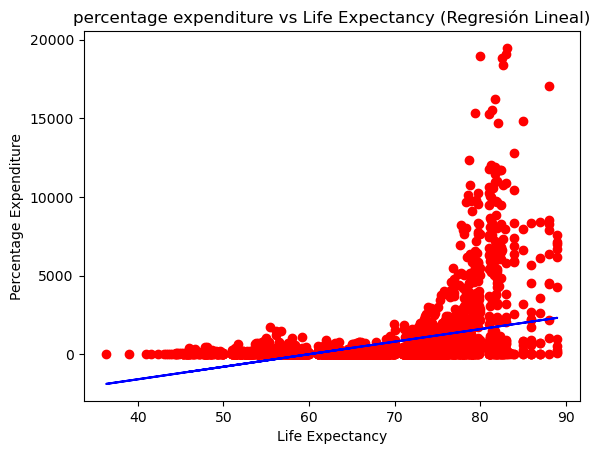

In [51]:
# Visualización de los resultados con Regresión Lineal
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('percentage expenditure vs Life Expectancy (Regresión Lineal)')
plt.xlabel('Life Expectancy')
plt.ylabel('Percentage Expenditure')
plt.show()

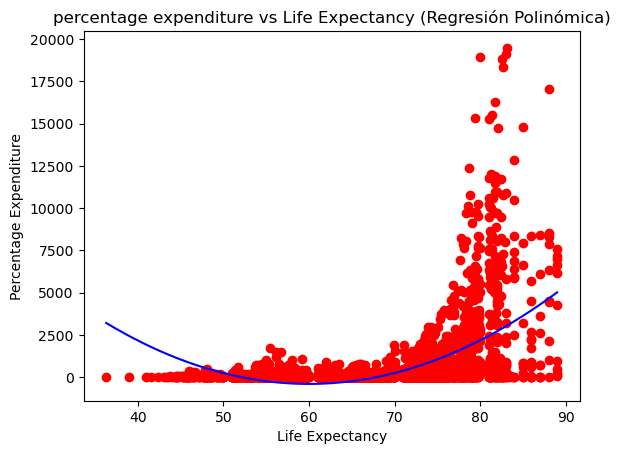

In [52]:
# Visualización de los resultados con Regresión Polinómica
# Se usa curva suavizada ordenada para evitar líneas extrañas
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly_reg.transform(X_range)
y_pred = lin_reg_2.predict(X_range_poly)

plt.scatter(X, y, color='red')
plt.plot(X_range, y_pred, color='blue')
plt.title('percentage expenditure vs Life Expectancy (Regresión Polinómica)')
plt.xlabel('Life Expectancy')
plt.ylabel('Percentage Expenditure')
plt.show()

In [55]:
# Predicción con Regresión Lineal
print("Predicción Lineal para Life Expectancy = 70:", lin_reg.predict([[70]]))

# Predicción con Regresión Polinómica
print("Predicción Polinómica para Life Expectancy = 70:", lin_reg_2.predict(poly_reg.transform([[70]])))

Predicción Lineal para Life Expectancy = 70: [799.27249856]
Predicción Polinómica para Life Expectancy = 70: [251.83816651]


# ANÁLISIS

## Métrics de Error: MSE & RMSE

Miden el promedio del error cuadrado entre los valores reales y predichos. RMSE da una idea más intuitiva al estar en las mismas unidades. <br>
Para evaluarlos, si tienen menores valores indican mejor desempeño.

In [62]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred_poly)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 2915606.426356938
RMSE: 1707.514692867074


## Análisis de P-Valores

Los valores p indican si los coeficientes del modelo son estadísticamente significativos. <br> Mientras más cercanos al 0 sean, más significativos para el modelo serán.

In [70]:
from scipy import stats

# --- Cálculo de P-valores de la Regresión Polinómica ---

# Predicciones y residuos
y_pred = lin_reg_2.predict(X_poly)
residuos = y - y_pred

n = len(y)                    # número de observaciones
p = X_poly.shape[1]           # número de predictores (incluyendo el término independiente)

# Error cuadrático medio residual (s^2)
s_squared = np.sum(residuos**2) / (n - p)
s = np.sqrt(s_squared)

# Matriz (X^T X)^-1
XTX_inv = np.linalg.inv(X_poly.T @ X_poly)

# Errores estándar
standard_errors = np.sqrt(np.diag(XTX_inv) * s_squared)

# Estadísticos t
t_stats = lin_reg_2.coef_ / standard_errors
t_stats[0] = lin_reg_2.intercept_ / standard_errors[0]  # intercepto

# p-valores
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p)) for t in t_stats]

# Resultados
print("\nSignificancia de Coeficientes (P-valores)")
for i, (coef, t, pval) in enumerate(zip(lin_reg_2.coef_, t_stats, p_values)):
    if i == 0:
        print(f"Intercepto: Coef = {lin_reg_2.intercept_:.4f}, t = {t:.4f}, p-valor = {pval:.4f}")
    else:
        print(f"X^{i}: Coef = {coef:.4f}, t = {t:.4f}, p-valor = {pval:.4f}")


Significancia de Coeficientes (P-valores)
Intercepto: Coef = 22741.5149, t = 17.4978, p-valor = 0.0000
X^1: Coef = -771.3932, t = -19.4377, p-valor = 0.0000
X^2: Coef = 6.4302, t = 21.5221, p-valor = 0.0000


Esto nos indica que todos los coeficientes son **estadísticamente significativos**, es decir, que sí aportan valor al modelo.